c:\Users\kevin\miniconda3\envs\tf\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


           Date       Close
0    2018-01-02   43.064999
1    2018-01-03   43.057499
2    2018-01-04   43.257500
3    2018-01-05   43.750000
4    2018-01-08   43.587502
...         ...         ...
1421 2023-08-25  178.610001
1422 2023-08-28  180.190002
1423 2023-08-29  184.119995
1424 2023-08-30  187.649994
1425 2023-08-31  187.869995

[1426 rows x 2 columns]
[[0.04672083]
 [0.04667422]
 [0.04791721]
 ...
 [0.92336973]
 [0.94530847]
 [0.94667577]]
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__i

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


18/18 - 14s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0036 - 14s/epoch - 781ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0036 - 448ms/epoch - 25ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0036 - 263ms/epoch - 15ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0036 - 267ms/epoch - 15ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0036 - 272ms/epoch - 15ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0036 - 261ms/epoch - 15ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0036 - 254ms/epoch - 14ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0000e+00 - accuracy:

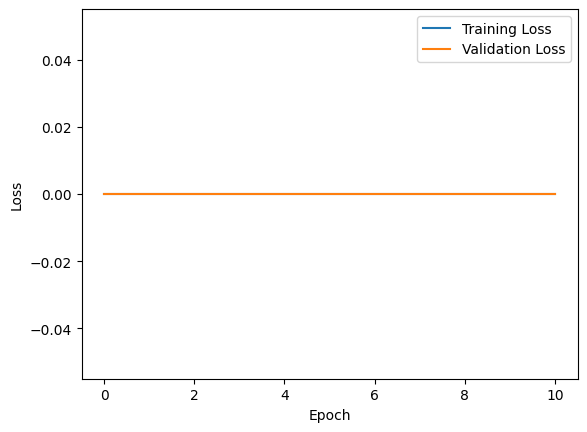

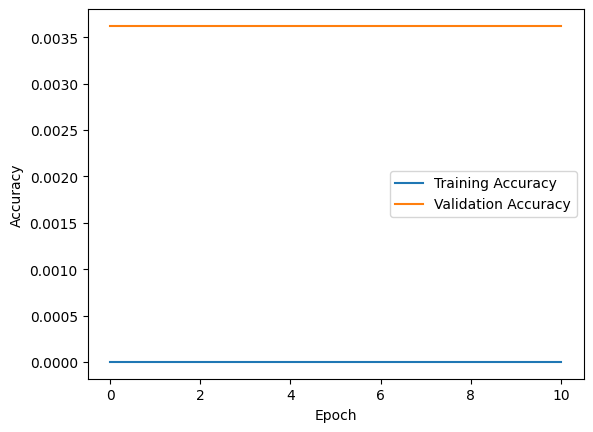

9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0036
Loss di data uji: [0.0, 0.0036231884732842445]
Loss di data uji: [0.0, 0.0036231884732842445]
9/9 [==============================] - 1s 4ms/step
------------------------------ Metric -----------------------------------
RMSE :  0.248860918253699
MSE  :   0.06193175663407425
MAE  :   0.22249204920036428
-------------- Mengecek Apakah Nilainya Overfit atau tidak --------------



In [1]:
import yfinance as yf
from datetime import date
import pandas as pd
import numpy as np
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Input dari pengguna untuk simbol saham
symbol = input("Masukkan simbol saham (misalnya 'AAPL'): ")
start_date = date(2018, 1, 1)
end_date = date(2023, 9, 1)

# Mengunduh data saham dari Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Menambahkan kolom tanggal sebagai indeks
data.reset_index(inplace=True)

# Input dari pengguna untuk fitur yang akan digunakan
input_feat = input("Masukkan fitur yang akan digunakan (misalnya 'Close'): ")

# Memilih kolom tanggal dan fitur yang akan digunakan
data = data[["Date", input_feat]]

print(data)




# Melakukan penskalaan fitur
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[input_feat].values.reshape(-1, 1))

print(scaled_data)
print(dir(scaled_data))



# Pembagian data menjadi data latih dan data uji
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size, :], scaled_data[train_size:, :]


print(train_data)
print(train_data.shape)
print(dir(train_data))




# Persiapan data untuk model LSTM
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        target.append(data[i+sequence_length])
    return np.array(sequences), np.array(target)

sequence_length = 10  # Anda dapat mengubah panjangnya sesuai kebutuhan
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

input = 10000  # Contoh: Anda membatasi kosakata hingga 10.000 kata paling umum.
embedding_dim = 100  # Contoh: Gunakan embedding dengan dimensi 100.

# Membangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=input, output_dim=embedding_dim, input_length=sequence_length))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='softmax'))
model.summary()


# Kompilasi dan pelatihan model
cp3 = ModelCheckpoint('model3/', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


# optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2, callbacks=[cp3, early_stopping], validation_data=(X_test, y_test))

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot metrik lainnya (jika ada)
# Misalnya, jika Anda memiliki metrik akurasi:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()





# Evaluasi model pada data uji
loss = model.evaluate(X_test, y_test)
print("Loss di data uji:", loss)

print("Loss di data uji:", loss)
predict = model.predict(X_test)
# print(predict)

print("------------------------------ Metric -----------------------------------")
print('RMSE : ',sqrt(metrics.mean_squared_error(y_test,predict)))
print('MSE  :  ',metrics.mean_squared_error(y_test,predict))
print('MAE  :  ',metrics.mean_absolute_error(y_test,predict))

print('-------------- Mengecek Apakah Nilainya Overfit atau tidak --------------')
print()


# Simpan model
model.save("lstm_model3.keras")
